А.В. Мигаль | Учебная Группа МЯТ231С, НИУ ВШЭ

Документ проекта подготовлен с использованием шаблона, представленного В.И. Фирсановой для курса "Основы программирования на Python"


# Название проекта: Описательный анализ готовой базы данных пассажиров Титаника


## I. Введение

Цель проекта: произвести разведочный анализ для подготовленной базы данных пассажиров корабля "Титаник"

Задачи:

1. Найти подходящий для анализа датасет на платформе Kaggle
2. Произвести предварительную обработку данных
3. Визуализировать распределение возрастов пассажиров, классов билетов, выживаемость и другие доступные данные
4. Выявить возможную корреляцию между критерием выживаемости и зафиксированными в датасете индивидуальными характеристиками пассажиров


Результаты проекта могут использоваться в качестве основы для разработки модели машинного обучения для индуктивного прогностического анализа выживаемости пассажиров корабля "Титаник" и последующего участия разработанной модели в соревновании Titanic - Machine Learning from Disaster.

## II. Описание датасета

Датасет выгружен по ссылке [kaggle.com](https://www.kaggle.com/c/titanic/data). Данные собирались для проведения соревнования Titanic - Machine Learning from Disaster и включают в себя подробную информацию о группе пассажиров на борту корабля, состоящей из 891 человека разного возраста, гендерной принадлежности и социального статуса.


In [ ]:
import pandas as pd
import numpy as np

data_path = "/train.csv"
df = pd.read_csv(data_path)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Датасет представлен в формате CSV и содержит атрибуты, описывающие уникальный ID пассажира, класс его билета (первый, второй и третьий, соответственно), имя, пол, возраст.

Столбцы sibsp и parch дают представление о количестве находящихся на борту родственниках пассажира, с разделением на категории супругов (sibsp) и родителей/детей (parch).

В колонках ticket, fare и cabin размещены данные, включающие в себя номер билета пассажира, его денежный взнос за билет и номер кабины (стоит заметить, что в 687 строках данная информация отсутствует).

Колонка embarked указывает на то в каком порту была осуществлена посадка пассажира. Для неё приняты следующие аббревиатуры: C = Cherbourg, Q = Queenstown, S = Southampton.

Отдельную важность представляет колонка survived, содержащая информацию о том, пережил ли пассажир крушение корабля (0 - нет, 1 -да).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Преобладающим типом данных в датасете выступают integer (целые числа) и object (гетерогенная структура, предполагающая тип данных sting или string, комбинированный с другими типами данных), представленные в количестве 5 штук каждый. Однако дважды встречаются float (числа с плавающей запятой).
Файл занимает приблизительно 83.7 KB места на диске.
Количество ненулевых значений в представленном датасете в большинстве случаев эквивалентно количеству самих строк. Исключения составляют атрибуты Age (представлено 714 значений из 891), Cabin (представлено 204 значения из 891) и Embarked (представлено 889 значений из 891).

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Таким образом, датасет содержит информацию о 891 объекте (пассажире).

Средний возраст пассажира составляет 29 лет, с минимальным показателем 0,4 года и максимальным 80 лет.

Пассажир может иметь на борту от 0 до 8 родственников и от 0 до 6 детей.

Процент выживших (mean) равен 38,38%.

## III. Анализ данных

Теперь представляется возможным посчитать точное количество выживших в имеющимся множестве пассажиров.



In [ ]:
survival_counts = df['Survived'].value_counts()
print(survival_counts)

0    549
1    342
Name: Survived, dtype: int64


Проверим табличные данные воспользовавшись стандартной формулой расчета процента.

In [ ]:
amount = 891
survival_amount = 342
percent = 100 / amount
survival_percent = percent * survival_amount
print('survival percent =', survival_percent)

survival percent = 38.38383838383839


Всё верно!

Также мы можем вычислить средний возраст пассажира для каждого пола.

In [ ]:
average_age_by_gender = df.groupby('Sex')['Age'].mean()
print(average_age_by_gender)

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64


Таким образом, средний возраст пассажира-женщины равен **27 лет**, а средний возраст пассажира-мужчины **30 лет**.

Составим совместное распределение величин pclass (класс билета) и survived (выживаемость) с помощью метода кросстабуляции.

In [ ]:
pclass_survival_ct = pd.crosstab(df['Pclass'], df['Survived'])
print(pclass_survival_ct)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


Результаты указывают на то, что больше всего выживших пришлось на пассажиров **первого класса** (136), а больше всего погибших на пассажиров **третьего класса** (327).

Для пассажиров **второго класса** количество выживших и погибших примерно одинаково (97 погибших против 87 выживших).

Проделаем схожую операцию для атрибутов sex и age.

In [ ]:
sex_survival_ct = pd.crosstab(df['Sex'], df['Survived'])
print(sex_survival_ct)

Survived    0    1
Sex               
female     81  233
male      468  109


Как мы видим, колчество выживших женщин (233) в два раза превышает количество выживших мужчин (109).

Тем временем количество погибших мужчин (468) больше количества погибших женщин (81) почти в 8 раз.



Однако, кросстабуляция для age не даёт нам полного представления о взаимосвязи возраста пассажира и его выживаемости. Это связано с большим количеством нулевых значений для данного атрибута.

In [ ]:
age_survival_ct = pd.crosstab(df['Age'], df['Survived'])
print(age_survival_ct)

Survived  0  1
Age           
0.42      0  1
0.67      0  1
0.75      0  2
0.83      0  2
0.92      0  1
...      .. ..
70.00     2  0
70.50     1  0
71.00     2  0
74.00     1  0
80.00     0  1

[89 rows x 2 columns]


Заменим пустые ячейки в колонке age средним возрастом пассажира.

In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

Теперь добавим в датафрейм df новую колонку is_child для разграничения возрастных групп на детей (Child) и взрослых (Adult).

In [ ]:
df['is_child'] = np.where(df['Age'] < 18, 'Child', 'Adult')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_child
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult


Попробуем провести кросстабуляцию атрибутов is_child и Survived, чтобы узнать коррелируют ли возраст и потенциальная выживаемость пассажира.

In [ ]:
age_survival_ct = pd.crosstab(df['is_child'], df['Survived'])
print(age_survival_ct)

Survived    0    1
is_child          
Adult     497  281
Child      52   61


Результат показывает, что подобная корреляция может существовать: после крушения корабля выжило больше половины **детей** (61) и лишь около 1/3 **взрослых** (281).

## IV. Визуализация данных

Теперь приступим к визуализации обработанных данных. В качестве основного инструмента для визуализации была выбрана стобцовая диаграмма, созданная с помощью библиотек seaborn и matplotlib.

Для начала импортируем нужные библиотеки.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Диаграмма зависимости класса пассажира и его выживаемости:

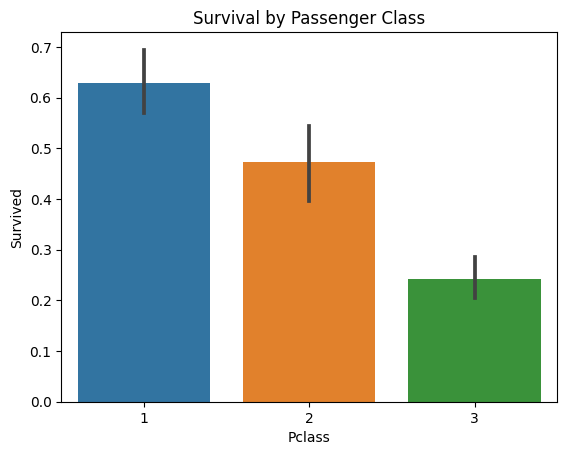

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()

Диаграмма зависимости пола пассажира и его выживаемости:

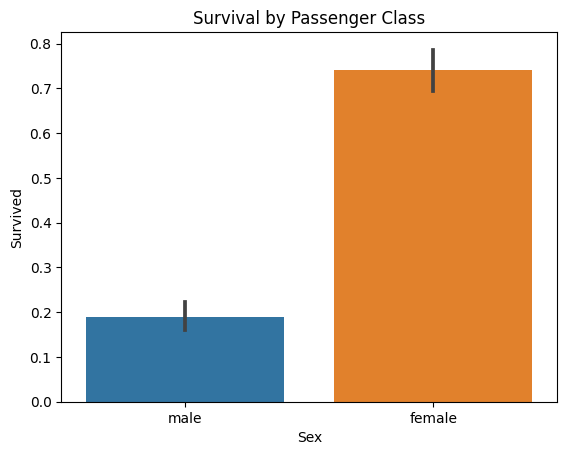

In [ ]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()

Диаграмма зависимости возрастной категории пассажира и его выживаемости:

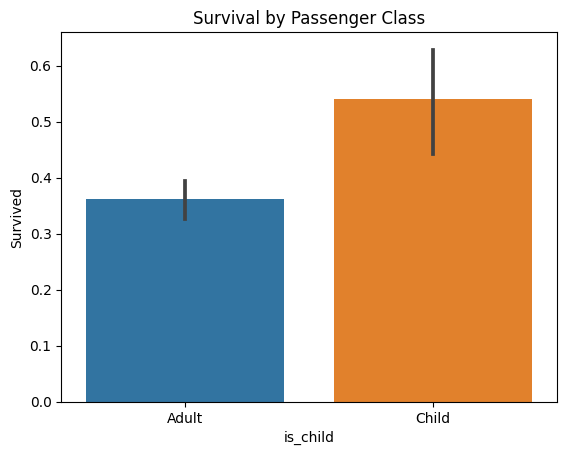

In [ ]:
sns.barplot(x='is_child', y='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()

## V. Выводы

В результате работы была проанализирована готовая база данных пассажиров титаника.

Представленый датасет обладает весом 83.7 KB и включает в себя 891 объект с уникальными атрибутами PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked. Каждый перечисленный атрибут был изучен и подробно описан в ходе предварительного анализа датасета:

 - Атрибуты включают в себя данные типа integer (5), object (5) и float (2).

 - Средний возраст пассажира составляет 29 лет, с минимальным показателем 0,4 года и максимальным 80 лет.

 - Пассажир может иметь на борту от 0 до 8 родственников и от 0 до 6 детей.

 - Процент выживших (mean) равен 38,38%.

В качестве наиболее релевантных атрибутов для дальнейшего анализа были выбраны пол (sex), возраст (age) и класс билета (pclass) пассажира.

Основынм методом анализа послужила кросстабуляция. Для ее применения к возрасту и упрощения дальнейшей визуализации был создан новый атрибут is_child, указывающий на принадлежность пассажира к одной из двух возрастных групп: Child или Adult. Полученные результаты свидетельствуют о прямой взаимосвязи между названными выше атрибутами и потенциальной выживаемостью пассажира:

 - Наибольший шанс выжить имели пассажиры первого класса (136 выживших и 80 погибших), а наименьший - третьего класса (119 выживших и 327 погибших).
 - Вероятность выживаемости для пассажира-женщины, в среднем выше, чем для пассажира-мужчины (всего уцелело 233 женщины и 109 мужчин).
 - Подобная корреляция существует и для возраста пассажира: выжило больше половины детей (61) и примерно 1/3 взрослых (281).

 Возможно это связано с тем, что приемущество при посадке в спасательные шлюпки отдавалось женщинам и детям.

 Полученные данные были проиллюстрированы с помощью библиотек seaborn и matplotlib.

 Таким образом, можно констатировать, что поставленные задачи и цель работы выполнены.

 Дальнейшее развитие проекта могло бы включать в себя более комплексный анализ датасета, например, изучение корреляции между выживаемостью и другими атрибутами (SibSp,	Parch,	Ticket,	Fare,	Cabin и др.), а также создание модели машинного обучения, предсказывающую выживаемость пассажиров корабля, в зависимости от вводных данных.


--------------

Сложнее всего в работе над проектом было разобраться с устройством библиотек и понять их внутреннюю логику. Но, тем не менее, это оказалось проще, чем я думал, когда загружал pandas и numpy. Мне впервые пришлось работать с таким большим датасетом, и я рад, что в ходе работы получилось нащупать нужные методы и даже достичь выводов. Хотя, справедливости ради, в работе над проектом мне пригодилось всё, что мы изучали: от словарей и арифметических операций до языка разметки markdown.

Раньше я был знаком с Python лишь поверхностно и не имел серьезного опыта в программировании. На этом курсе я углубился в синтаксис языка и теперь могу самостаятельно (пусть и подглядывая в форумы, чатботы и прочие ресурсы) решать несложные задачи в сфере анализа данных и NLP. Было очень интересно узнать о существующих парадигмах программирования и сферах применения "Питона" в реальной жизни! Я очень надеюсь, что на этом мой путь освоения Python не закончится. Как говорится, дальше - больше.

Спасибо Вам за чудесный курс и то, что всегда были на связи!